# Plan de trabajo - Proyecto de Telecomunicaciones

## Cliente:  CallMeMaybe

## Recursos:

Link al Tableau Dashboard: https://public.tableau.com/app/profile/humberto.barrera.vargas/viz/Proyect14/CallMeMaybeDashboard?publish=yes

Link a la presentación: https://drive.google.com/file/d/1NNBhBv63E6d8JdeAmHzZhW_2aF5pTfyS/view?usp=sharing


## Problema:

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

## Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

## 1) En qué consiste el caso del negocio


El objetivo es mejorar la eficiencia operativa de los operadores de CallMeMaybe, identificando a aquellos que presentan bajo desempeño en la gestión de llamadas (entrantes, salientes e internas), para brindar información útil a los supervisores y optimizar la atención al cliente.

## 2) Qué se desea resolver  


Detectar operadores ineficaces, definidos por:  
- Alto número de llamadas entrantes perdidas (internas y externas)  
- Tiempos de espera prolongados para llamadas entrantes  
- Bajo número de llamadas salientes (cuando corresponde)

## 3) Realizar un Análisis exploratorio de datos (EDA)
 


- Importación de librerías
- Revisión y limpieza de los datasets  
- Identificación valores atípicos, duplicados o nulos  


### - Importación de librerías


In [134]:
#- Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
from scipy.stats import ttest_ind
from scipy.stats import levene
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### - Revisión y limpieza de los datasets  


In [135]:
# - Revisión y limpieza de los datasets  
pd.set_option('display.max_columns', None)

dataset = pd.read_csv('datasets/telecom_dataset_new.csv') 
clients = pd.read_csv('datasets/telecom_clients.csv')  

In [136]:
# Exploración inicial de los datos
print(dataset.info())
print(dataset.head())

print(clients.info())
print(clients.head())

# Descripción estadística de los datos
print('----------------------------------------------------------------------------')
print('Descripción estadística del dataset:')
print(dataset.describe())
print(clients.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out

In [137]:
#Conversión de las columnas de tipo fecha
dataset['date'] = pd.to_datetime(dataset['date']).dt.date

clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')
dataset.info()
print('----------------------------------------------------------------------------')
clients.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----  

In [138]:
#Min y Max de las columnas de fecha en amboa datasets para verificar el rango de fechas
print('----------------------------------------------------------------------------')
print('Mínimo y máximo de las columnas de fecha:')
print('Dataset - date:')    
print('Mínimo:', dataset['date'].min())
print('Máximo:', dataset['date'].max())
print('----------------------------------------------------------------------------')
print('Clientes - date_start:')
print('Mínimo:', clients['date_start'].min())
print('Máximo:', clients['date_start'].max())

----------------------------------------------------------------------------
Mínimo y máximo de las columnas de fecha:
Dataset - date:
Mínimo: 2019-08-02
Máximo: 2019-11-28
----------------------------------------------------------------------------
Clientes - date_start:
Mínimo: 2019-08-01 00:00:00
Máximo: 2019-10-31 00:00:00


### - Identificación valores atípicos, duplicados o nulos  


In [139]:
#Revisamos los valores nulos del dataset
print('Valores nulos por columna:')
print('----------------------------------------------------------------------------')
print(dataset.isnull().sum())
print('----------------------------------------------------------------------------')
print(clients.isnull().sum())


Valores nulos por columna:
----------------------------------------------------------------------------
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
----------------------------------------------------------------------------
user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [140]:
#Revisamos si hay alguna relación entre los valores nulos de la columna internal con los de la columna operator_id
print('----------------------------------------------------------------------------')
print('Relación entre valores nulos de internal y operator_id:')
print(dataset[dataset['internal'].isnull()]['operator_id'].count())
print(dataset.shape[0])
print('Proporción de valores nulos en internal con respecto a operator_id:')
print(dataset[dataset['internal'].isnull()]['operator_id'].count() / dataset.shape[0] * 100, '%')

#Revisamos los valores nulos de la columna operator_id
print('----------------------------------------------------------------------------')
print('Valores nulos en operator_id:')
print(dataset['operator_id'].isnull().sum())
print('Proporción de valores nulos en operator_id:')
print(dataset['operator_id'].isnull().sum() / dataset.shape[0] * 100, '%')


----------------------------------------------------------------------------
Relación entre valores nulos de internal y operator_id:
60
53902
Proporción de valores nulos en internal con respecto a operator_id:
0.11131312381729805 %
----------------------------------------------------------------------------
Valores nulos en operator_id:
8172
Proporción de valores nulos en operator_id:
15.160847463915998 %


Casi más de la mitad de los valores nulos en la columna "internal" no están ligados a un "operator_id". Procedemos a eliminar dichos 117 registros los cuales representan el 0.11%
Dado que el ejercicio es determinar el número de operadores ineficaces, las filas con registros sin "operator_id" no nos servirían para dicha identificación.

Se procede a eliminar los nulos de dichas columnas.

In [141]:

dataset_cleaned = dataset.dropna(subset=['internal','operator_id'])
print('----------------------------------------------------------------------------')
print('Dimensiones del dataset después de eliminar los registros con valores nulos:')
print(dataset_cleaned.shape)
print(dataset_cleaned.isnull().sum())


----------------------------------------------------------------------------
Dimensiones del dataset después de eliminar los registros con valores nulos:
(45670, 9)
user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


In [142]:
# Revisión de duplicados
print('----------------------------------------------------------------------------')
print('Número de filas duplicadas:')
print(dataset_cleaned.duplicated().sum())
print(clients.duplicated().sum())

----------------------------------------------------------------------------
Número de filas duplicadas:
4179
0


In [143]:
print(dataset_cleaned.duplicated().sum() / dataset_cleaned.shape[0] * 100, '%')


9.15042697613313 %


Procedo a dejar los valores duplicados ya que pudiera considerarse que un usuario pueda hablar varias veces al mismo operador en el mismo dia.

### - Enriquecemos los datos

In [144]:
#Generamos una columna que tenga el tiempo de espera de las llamadas entrantes
dataset_cleaned['waiting_time'] = dataset_cleaned['total_call_duration'] - dataset_cleaned['call_duration']
print(dataset_cleaned.head())

   user_id        date direction internal  operator_id  is_missed_call  \
1   166377  2019-08-05       out     True     880022.0            True   
2   166377  2019-08-05       out     True     880020.0            True   
3   166377  2019-08-05       out     True     880020.0           False   
4   166377  2019-08-05       out    False     880022.0            True   
5   166377  2019-08-05       out    False     880020.0           False   

   calls_count  call_duration  total_call_duration  waiting_time  
1            3              0                    5             5  
2            1              0                    1             1  
3            1             10                   18             8  
4            3              0                   25            25  
5            2              3                   29            26  


## 4) Preguntas intermedias


- ¿Cuáles operadores tienen mayor cantidad de llamadas perdidas?  
- ¿Qué operadores presentan mayores tiempos de espera promedio?  
- ¿Qué proporción de llamadas salientes realiza cada operador?   

Número de operadores únicos: 1092
Número de operadores con llamadas perdidas en el periodo: 239
     operator_id  calls_count
98      913942.0           55
210     944226.0           38
206     944216.0           32
196     940588.0           30
6       885890.0           27
179     937956.0           25
5       885876.0           24
222     951508.0           24
208     944220.0           21
217     948286.0           18
El máximo número de llamadas perdidas por un operador fue de: 55
Los operadores con más del 20% de llamadas perdidas con respecto al máximo registrado son:
    operator_id  calls_count
0      913942.0           55
1      944226.0           38
2      944216.0           32
3      940588.0           30
4      885890.0           27
5      937956.0           25
6      951508.0           24
7      885876.0           24
8      944220.0           21
9      948286.0           18
10     940622.0           18
11     940630.0           17
12     944222.0           17
13     94421

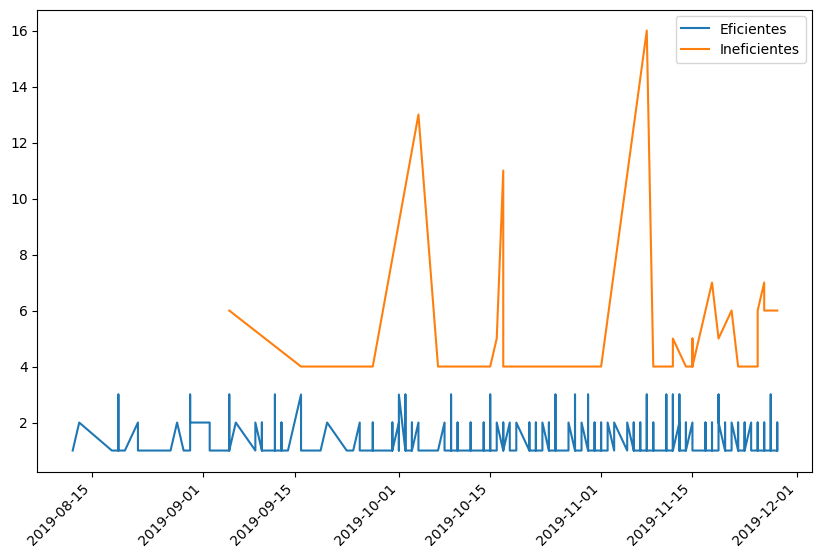

In [145]:
#Procedemos a identificar cuantos operadores unicos hay en el dataset
operadores_unicos = dataset_cleaned['operator_id'].nunique()
print("Número de operadores únicos:", operadores_unicos)
 
#Revisamos cuantos operadores tienen llamadas perdidas (entrantes y no internas)
operadores_llamadas_perdidas = dataset_cleaned[(dataset_cleaned['is_missed_call'] == True) & (dataset_cleaned['direction'] == 'in')]['operator_id'].nunique()
print("Número de operadores con llamadas perdidas en el periodo:", operadores_llamadas_perdidas)

#Revisamos de esos operadores el número de llamadas perdidas que tienen registradas
operadores_llamadas_perdidas_detalle = dataset_cleaned[(dataset_cleaned['is_missed_call'] == True) & (dataset_cleaned['direction'] == 'in')].groupby('operator_id')['calls_count'].sum().reset_index()
print(operadores_llamadas_perdidas_detalle.sort_values(by='calls_count', ascending=False).head(10))

operadores_mayores_llamadas_perdidas = operadores_llamadas_perdidas_detalle[operadores_llamadas_perdidas_detalle['calls_count'] > (0.20 * operadores_llamadas_perdidas_detalle['calls_count'].max())]
print("El máximo número de llamadas perdidas por un operador fue de:", operadores_mayores_llamadas_perdidas['calls_count'].max())
print("Los operadores con más del 20% de llamadas perdidas con respecto al máximo registrado son:")
print(operadores_mayores_llamadas_perdidas.sort_values(by='calls_count', ascending=False).reset_index(drop=True))
print(operadores_mayores_llamadas_perdidas['operator_id'].nunique())



operadores_fechas = dataset_cleaned[(dataset_cleaned['is_missed_call'] == True) & (dataset_cleaned['direction'] == 'in')].groupby(['date','operator_id'])['calls_count'].sum().reset_index()

operadores_ef_llamadas_perdidas = operadores_fechas[operadores_fechas['calls_count'] < (0.20 * operadores_fechas['calls_count'].max())]
operadores_inef_llamadas_perdidas = operadores_fechas[operadores_fechas['calls_count'] > (0.20 * operadores_fechas['calls_count'].max())]

op1 = operadores_ef_llamadas_perdidas[['date','calls_count']]
op2 = operadores_inef_llamadas_perdidas[['date','calls_count']]
 

plt.figure(figsize=(10, 6))

plt.plot(op1['date'], op1['calls_count'], label='Eficientes')
plt.plot(op2['date'], op2['calls_count'], label='Ineficientes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()



Se grafica el número de llamadas realizadas por los operadores durante el periodo de tiempo recibido notándose la variabilidad de aquellos operadores ineficientes respecto al número de llamadas perdidas

Se identificaron a 21 operadores con un número de llamadas perdidas superior al 20% del máximo registrado en el sistema

In [146]:
#Acotamos a los operadores con un tiempo de espera prolongado para las llamadas entrantes (mayor a 300 segundos)
operadores_con_larga_espera = dataset_cleaned[(dataset_cleaned['waiting_time'] > 300) & (dataset_cleaned['direction'] == 'in')].groupby('operator_id')['calls_count'].sum().reset_index()

print("Los operadores con el mayor tiempo de espera (mayor a 300 segundos) son:")
print(operadores_con_larga_espera.sort_values(by='calls_count', ascending=False).reset_index(drop=True))
print(operadores_con_larga_espera['operator_id'].nunique())

Los operadores con el mayor tiempo de espera (mayor a 300 segundos) son:
    operator_id  calls_count
0      913938.0         5037
1      921318.0         2381
2      913942.0         2290
3      931458.0         1978
4      919790.0         1720
..          ...          ...
84     951506.0            9
85     908834.0            7
86     890404.0            7
87     920728.0            7
88     920902.0            3

[89 rows x 2 columns]
89


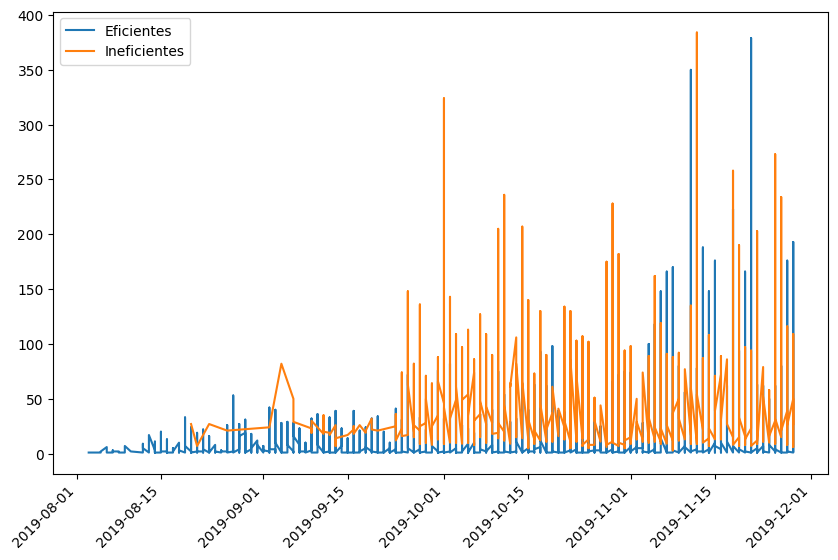

In [147]:
operadores_ef_tiempo_espera = dataset_cleaned[(dataset_cleaned['waiting_time'] < 300) & (dataset_cleaned['direction'] == 'in')].groupby(['date','operator_id'])['calls_count'].sum().reset_index()
operadores_inef_tiempo_espera = dataset_cleaned[(dataset_cleaned['waiting_time'] > 300) & (dataset_cleaned['direction'] == 'in')].groupby(['date','operator_id'])['calls_count'].sum().reset_index()

op1 = operadores_ef_tiempo_espera[['date','calls_count']]
op2 = operadores_inef_tiempo_espera[['date','calls_count']]


plt.figure(figsize=(10, 6))

plt.plot(op1['date'], op1['calls_count'], label='Eficientes')
plt.plot(op2['date'], op2['calls_count'], label='Ineficientes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Se grafica al número de llamadas registradas con un tiempo de espera mayor a 300 segundos, distinguiendo ambos grupos de operadores respecto a esta métrica. Los operadores ineficientes con esta métrica se distinguen en su mayoria y poseen una gran cantidad de llamadas registradas con ésta condición. Los operadores eficientes, en ciertas parte aparecen casi empatando con respecto al número de llamadas, la diferencia es que esas llamadas duraron menos de 300 segundos de espera.

Se identificaron a 89 operadores con un tiempo de espera superior a los 300 segundos a las llamadas entrantes

In [148]:
#Acotamos a los operadores con un reducido número de llamadas salientes

operadores_llamadas_salientes = dataset_cleaned[(dataset_cleaned['direction'] == 'out')].groupby('operator_id')['calls_count'].sum().reset_index()
print(operadores_llamadas_salientes.sort_values(by='calls_count', ascending=False).reset_index(drop=True))
print(operadores_llamadas_salientes['operator_id'].nunique())
 
print("El máximo número de llamadas realizadas por un operador durante el periodo fue de:", operadores_llamadas_salientes['calls_count'].max())
print("El promedio de llamadas realizadas durante el periodo fue de:", operadores_llamadas_salientes['calls_count'].mean())


operadores_llamadas_salientes_bajas = operadores_llamadas_salientes[operadores_llamadas_salientes['calls_count'] < (0.2 * operadores_llamadas_salientes['calls_count'].max())]

print("Los operadores con un número de llamadas salientes inferior al 20% del máximo registrado son:")
print(operadores_llamadas_salientes_bajas.sort_values(by='calls_count', ascending=False).reset_index(drop=True))
print(operadores_llamadas_salientes_bajas['operator_id'].nunique())


     operator_id  calls_count
0       885876.0        64897
1       885890.0        64653
2       929428.0        24572
3       925922.0        21754
4       908640.0        16699
..           ...          ...
877     914256.0            1
878     970240.0            1
879     914626.0            1
880     914440.0            1
881     883898.0            1

[882 rows x 2 columns]
882
El máximo número de llamadas realizadas por un operador durante el periodo fue de: 64897
El promedio de llamadas realizadas durante el periodo fue de: 758.8922902494331
Los operadores con un número de llamadas salientes inferior al 20% del máximo registrado son:
     operator_id  calls_count
0       929426.0        12041
1       945286.0         7919
2       879898.0         7856
3       945302.0         7059
4       904016.0         5120
..           ...          ...
872     958458.0            1
873     900192.0            1
874     914440.0            1
875     883898.0            1
876     882478.0   

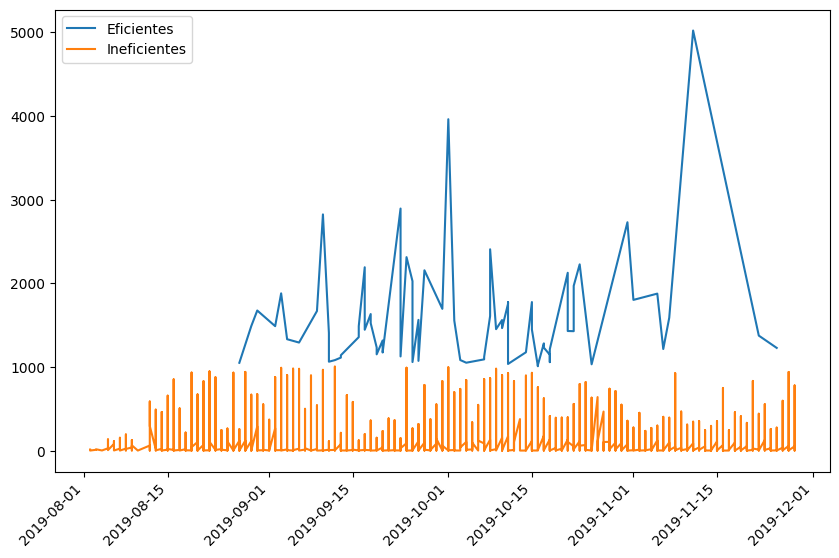

In [149]:
operadores_fechas = dataset_cleaned[(dataset_cleaned['direction'] == 'out')].groupby(['date','operator_id'])['calls_count'].sum().reset_index()

operadores_ef_llamadas_salientes = operadores_fechas[operadores_fechas['calls_count'] > (0.20 * operadores_fechas['calls_count'].max())]
operadores_inef_llamadas_salientes = operadores_fechas[operadores_fechas['calls_count'] < (0.20 * operadores_fechas['calls_count'].max())]

op1 = operadores_ef_llamadas_salientes[['date','calls_count']]
op2 = operadores_inef_llamadas_salientes[['date','calls_count']]


plt.figure(figsize=(10, 6))

plt.plot(op1['date'], op1['calls_count'], label='Eficientes')
plt.plot(op2['date'], op2['calls_count'], label='Ineficientes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Se grafican las llamadas realizadas por los operadores en el periodo de tiempo dado, distinguiendo a los ineficientes en ésta métrica los cuales estan por debajo del 20% del máximo número de llamadas registradas

Se identificaron a 487 operadores con un bajo conteo de llamadas durante el periodo con respecto al 20% del número máximo de dichas llamadas 

In [150]:
#Unimos los df operadores_llamadas_salientes_bajas, operadores_con_larga_espera y llamadas_perdidas_por_operador para identificar a los operadores que cumplen con alguna de las condiciones establecidas con inner join
operadores_problema_1 = pd.merge(operadores_llamadas_salientes_bajas, operadores_con_larga_espera, on='operator_id', how='inner', suffixes=('_salientes_bajas', '_larga_espera'))
operadores_problema_final = pd.merge(operadores_problema_1, operadores_mayores_llamadas_perdidas, on='operator_id', how='inner')
operadores_problema_final.columns = ['operator_id', 'llamadas_salientes', 'llamadas_larga_espera', 'llamadas_perdidas']
print("Los operadores más ineficientes son:")
print(operadores_problema_final.sort_values(by='llamadas_perdidas', ascending=False).reset_index(drop=True))
print(operadores_problema_final['operator_id'].nunique())

Los operadores más ineficientes son:
    operator_id  llamadas_salientes  llamadas_larga_espera  llamadas_perdidas
0      913942.0                 468                   2290                 55
1      944226.0                 134                     47                 38
2      944216.0                 147                     77                 32
3      940588.0                  77                    732                 30
4      951508.0                 153                    195                 24
5      944220.0                 232                    120                 21
6      940622.0                 815                    231                 18
7      940630.0                 180                   1019                 17
8      944222.0                 372                     52                 17
9      944218.0                 179                    118                 16
10     913938.0                 436                   5037                 15
11     931458.0            

Los 16 operadores antes listados figuran como **ineficaces** por cumplir con las condiciones que así los califican:
1) Tener una gran cantidad de llamadas entrantes perdidas (internas y externas).
2) Tener un tiempo de espera prolongado para las llamadas entrantes. 
3) Tener un número reducido de llamadas salientes.


##  5) Estrategias o herramientas para la solución
- Pruebas estadísticas de hipótesis


    - H0: La cantidad de llamadas perdidas promedio de los operadores Eficientes e Ineficientes son iguales.
    - H1: La cantidad de llamadas perdidas promedio de los operadores Eficientes e Ineficientes son diferentes.
    
Se ocuparaciá un nivel de significancia $\alpha$ de 0.05


In [151]:
op_ef_llam_perd = operadores_ef_llamadas_perdidas['calls_count']
op_inef_llam_perd = operadores_inef_llamadas_perdidas['calls_count']

In [152]:
alpha = 0.05

In [153]:
#Calculamos si las varianzas son iguales
_, pvalor_levene = levene(op_ef_llam_perd, op_inef_llam_perd)

if (pvalor_levene < alpha):
    print ('Se rechaza la hipótesis nula ya que las varianzas son distintas')
    variance = False
else:
    print ('No se rechaza la hipótesis nula, ya que las varianzas son iguales')
    variance = True

Se rechaza la hipótesis nula ya que las varianzas son distintas


In [154]:
#Aplicamos el ttest

_, pvalor = ttest_ind(op_ef_llam_perd, op_inef_llam_perd, equal_var=variance)

print(f"""
    El valor promedio de llamadas perdidas de operadores eficientes es: {op_ef_llam_perd.mean()}
    El valor promedio de llamadas perdidas de operadores ineficientes es: {op_inef_llam_perd.mean()}
    p-valor: {pvalor}
     """)

if (pvalor < alpha):
    print ('Se rechaza la hipótesis nula')
else:
    print ('No se rechaza la hipótesis nula')


    El valor promedio de llamadas perdidas de operadores eficientes es: 1.2410575427682737
    El valor promedio de llamadas perdidas de operadores ineficientes es: 5.3
    p-valor: 2.1721357770961634e-12
     
Se rechaza la hipótesis nula



    - H0: La cantidad de llamadas con un tiempo de espera mayor a 300 seg de los operadores Eficientes e Ineficientes son iguales.
    - H1: La cantidad de llamadas con un tiempo de espera mayor a 300 seg de los operadores Eficientes e Ineficientes son diferentes.
    
Se ocuparaciá un nivel de significancia $\alpha$ de 0.05


In [155]:
op_ef_tiempo_esp = operadores_ef_tiempo_espera['calls_count']
op_inef_tiempo_esp = operadores_inef_tiempo_espera['calls_count']

In [156]:
alpha = 0.05

In [157]:
#Calculamos si las varianzas son iguales
_, pvalor_levene = levene(op_ef_tiempo_esp, op_inef_tiempo_esp)

if (pvalor_levene < alpha):
    print ('Se rechaza la hipótesis nula ya que las varianzas son distintas')
    variance = False
else:
    print ('No se rechaza la hipótesis nula, ya que las varianzas son iguales')
    variance = True

Se rechaza la hipótesis nula ya que las varianzas son distintas


In [158]:
#Aplicamos el ttest

_, pvalor = ttest_ind(op_ef_tiempo_esp, op_inef_tiempo_esp, equal_var=variance)

print(f"""
    El valor promedio de llamadas con un tiempo de espera mayor a 300 seg de operadores eficientes es: {op_ef_tiempo_esp.mean()}
    El valor promedio de llamadas con un tiempo de espera mayor a 300 seg de operadores ineficientes es: {op_inef_tiempo_esp.mean()}
    p-valor: {pvalor}
     """)

if (pvalor < alpha):
    print ('Se rechaza la hipótesis nula')
else:
    print ('No se rechaza la hipótesis nula')


    El valor promedio de llamadas con un tiempo de espera mayor a 300 seg de operadores eficientes es: 6.03234257837203
    El valor promedio de llamadas con un tiempo de espera mayor a 300 seg de operadores ineficientes es: 41.04236343366778
    p-valor: 2.5860572701275095e-113
     
Se rechaza la hipótesis nula



    - H0: La cantidad de llamadas salientes promedio de los operadores Eficientes e Ineficientes son iguales.
    - H1: La cantidad de llamadas salientes promedio de los operadores Eficientes e Ineficientes son diferentes.
    
Se ocuparaciá un nivel de significancia $\alpha$ de 0.05


In [159]:
op_ef_llam_sal = operadores_ef_llamadas_salientes['calls_count']
op_inef_llam_sal = operadores_inef_llamadas_salientes['calls_count']

In [160]:
alpha = 0.05

In [161]:
#Calculamos si las varianzas son iguales
_, pvalor_levene = levene(op_ef_llam_sal, op_inef_llam_sal)

if (pvalor_levene < alpha):
    print ('Se rechaza la hipótesis nula ya que las varianzas son distintas')
    variance = False
else:
    print ('No se rechaza la hipótesis nula, ya que las varianzas son iguales')
    variance = True

Se rechaza la hipótesis nula ya que las varianzas son distintas


In [162]:
#Aplicamos el ttest

_, pvalor = ttest_ind(op_ef_llam_sal, op_inef_llam_sal, equal_var=variance)

print(f"""
    El valor promedio de llamadas salientes de operadores eficientes es: {op_ef_llam_sal.mean()}
    El valor promedio de llamadas salientes de operadores ineficientes es: {op_inef_llam_sal.mean()}
    p-valor: {pvalor}
     """)

if (pvalor < alpha):
    print ('Se rechaza la hipótesis nula')
else:
    print ('No se rechaza la hipótesis nula')


    El valor promedio de llamadas salientes de operadores eficientes es: 1600.5479452054794
    El valor promedio de llamadas salientes de operadores ineficientes es: 36.73557180851064
    p-valor: 3.1478405451298115e-31
     
Se rechaza la hipótesis nula


# 6) Conclusiones

a. **Identificación de operadores ineficientes:** Se logró identificar a 16 operadores que cumplen simultáneamente con los criterios de ineficacia: alto número de llamadas entrantes perdidas, tiempos de espera prolongados y bajo número de llamadas salientes.

b. **Diferencias estadísticamente significativas:** Las pruebas de hipótesis realizadas muestran diferencias significativas entre operadores eficientes e ineficientes en cuanto a llamadas perdidas, tiempos de espera y llamadas salientes, lo que valida los criterios utilizados para la clasificación.

c. **Impacto en la atención al cliente:** Los operadores ineficientes concentran una proporción relevante de llamadas perdidas y tiempos de espera elevados, lo que puede afectar negativamente la experiencia de los usuarios y la percepción del servicio.

d. **Oportunidad de mejora operativa:** La información obtenida permite a los supervisores focalizar acciones de capacitación, seguimiento y mejora en los operadores identificados, optimizando recursos y elevando la calidad del servicio.

f. **Herramientas analíticas efectivas:** El análisis exploratorio y las pruebas estadísticas aplicadas demuestran ser herramientas útiles para la gestión y mejora continua en servicios de telecomunicaciones.

g. **Recomendación:** Se sugiere implementar monitoreo regular de estos indicadores y establecer planes de acción específicos para los operadores ineficientes, así como revisar periódicamente los criterios de eficiencia conforme evolucione el servicio.